In [109]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import math

In [38]:
msft = yf.Ticker("MSFT")

In [261]:
df = msft.history(start="2020-01-01", end="2021-04-04")

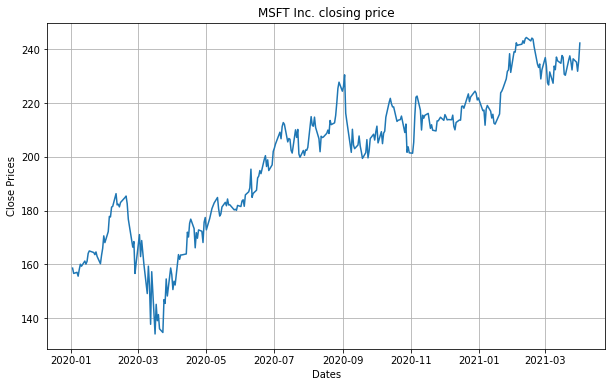

In [262]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df.Close)
plt.title('MSFT Inc. closing price')
plt.show()

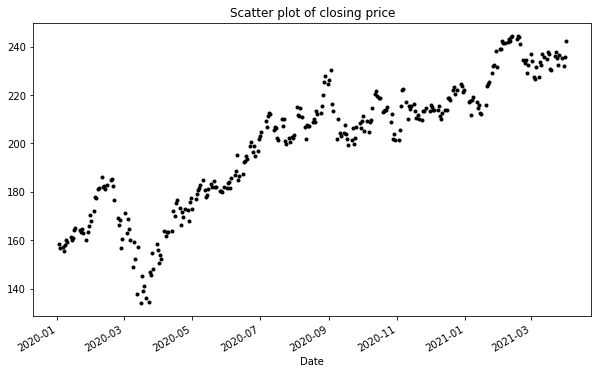

In [263]:
# Scatter Plot
df_close = df.Close
#print(type(df_close))
#df_close=pd.to_datetime(df_close['Date'])
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

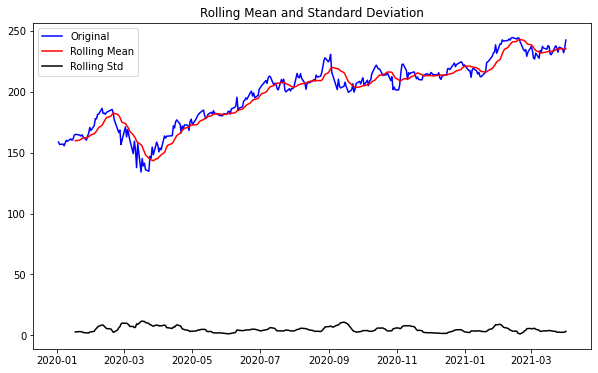

Results of dickey fuller test
Test Statistics                 -1.228596
p-value                          0.661175
No. of lags used                 9.000000
Number of observations used    305.000000
critical value (1%)             -3.451974
critical value (5%)             -2.871063
critical value (10%)            -2.571844
dtype: float64


In [264]:
#Null Hypothesis check
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

<Figure size 720x432 with 0 Axes>

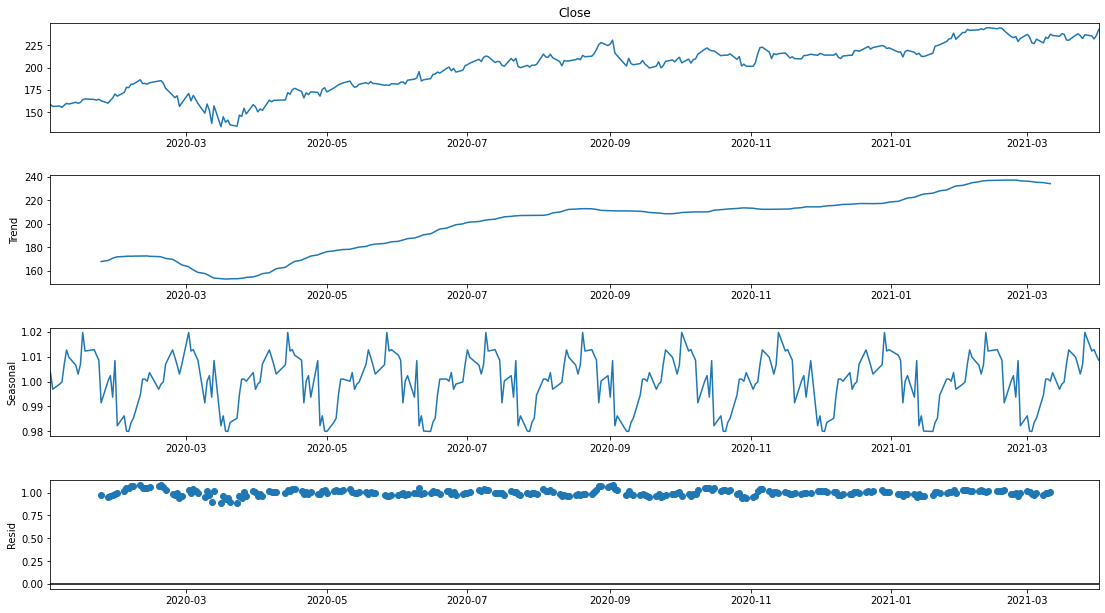

In [265]:
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


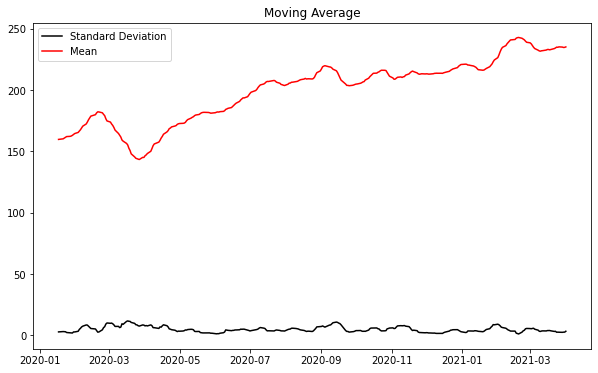

In [266]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = df_close
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

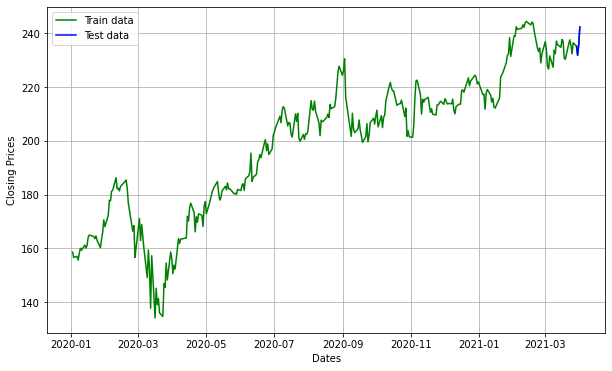

In [267]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.99):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [268]:
#Auto Arima model ti find out coeff p,d,q for Arima
model = pm.auto_arima(df.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1817.309, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1846.057, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1815.418, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1819.959, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1845.136, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1817.267, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1818.973, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1815.430, Time=0.01 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.339 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  315
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -904.709
Date:                Tue, 04 May 2021   AIC                           1815.418
Time:                        17:27:4

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


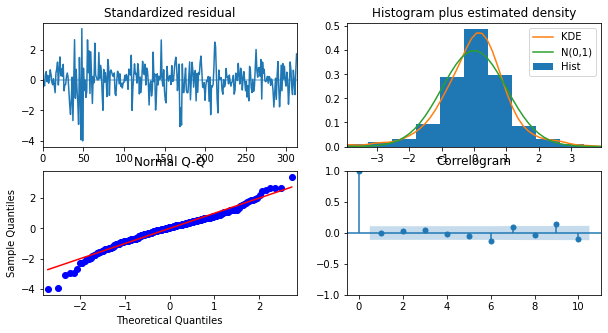

In [269]:
model.plot_diagnostics(figsize=(10,5))
plt.show()

In [171]:
#model = ARIMA(df_log, order=(3,1,0))  
#fitted = model.fit(disp=-1)  
#print(fitted.summary())

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
No handles with labels found to put in legend.


Date
2021-03-02    235.614801
2021-03-03    235.739366
2021-03-04    229.954386
2021-03-05    226.609860
2021-03-08    229.898043
2021-03-09    229.204320
2021-03-10    232.170097
2021-03-11    233.226017
2021-03-12    236.333990
2021-03-15    236.696695
2021-03-16    235.651718
2021-03-17    236.948159
2021-03-18    237.672595
2021-03-19    233.157961
2021-03-22    230.303588
2021-03-23    234.069661
2021-03-24    237.673213
2021-03-25    236.863015
2021-03-26    233.583866
2021-03-29    235.217432
2021-03-30    235.935101
2021-03-31    233.387656
2021-04-01    234.609462
dtype: float64
MSE: 16.209811716531537
MAE: 3.3398849754289364
RMSE: 4.026141045285366
R-squared score:  -0.18891759206453118


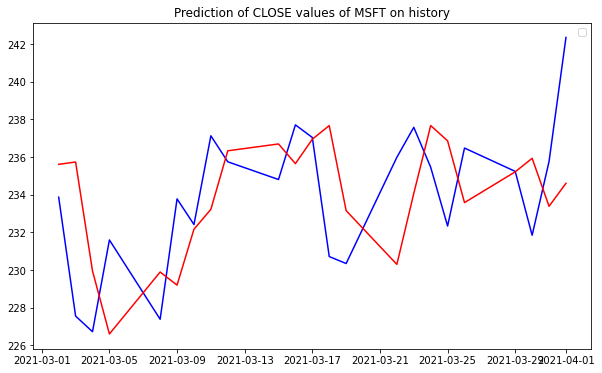

In [272]:
# Finding predicted values for last 31 days and plotting graph between predicted values and test actual values 
# of last 31 days
from math import sqrt
from matplotlib import pyplot

size = int(len(df.Close))-23
train, test = df.Close[0:size], df.Close[size:len(df.Close)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
series = pd.Series(predictions,index=test.index)
print(series)

# evaluate forecasts

# report performance

mse = mean_squared_error(test, series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, series))
print('RMSE: '+str(rmse))
r2 = r2_score(test, series, sample_weight=None, multioutput='uniform_average')
print('R-squared score: ', r2)


pyplot.figure(figsize=(10,6))
pyplot.title("Prediction of CLOSE values of MSFT on history")
pyplot.plot(test,color='blue')
pyplot.legend(loc='best')
pyplot.plot(series ,color='red')
pyplot.savefig("ARIMA ")
pyplot.show()

Todays Value :
Date
2021-04-01    242.350006
Name: Close, dtype: float64
Predicted values for next 30 days
2021-04-02    240.625469
2021-04-03    241.515041
2021-04-04    241.581742
2021-04-05    241.907466
2021-04-06    242.151655
2021-04-07    242.421510
2021-04-08    242.683286
2021-04-09    242.947605
2021-04-10    243.211123
2021-04-11    243.474893
2021-04-12    243.738584
2021-04-13    244.002300
2021-04-14    244.266008
2021-04-15    244.529719
2021-04-16    244.793428
2021-04-17    245.057139
2021-04-18    245.320848
2021-04-19    245.584558
2021-04-20    245.848268
2021-04-21    246.111978
2021-04-22    246.375688
2021-04-23    246.639398
2021-04-24    246.903108
2021-04-25    247.166818
2021-04-26    247.430528
2021-04-27    247.694238
2021-04-28    247.957948
2021-04-29    248.221658
2021-04-30    248.485368
2021-05-01    248.749078
dtype: float64


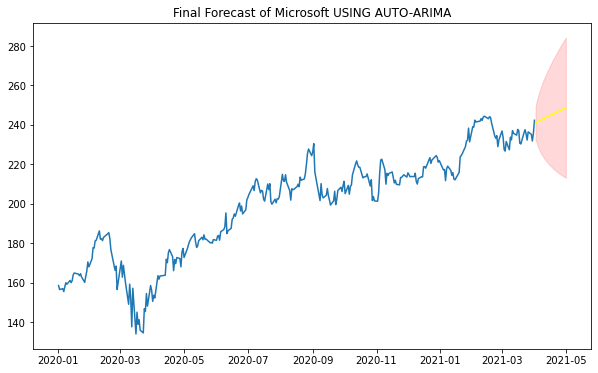

In [271]:
from datetime import timedelta  
# Forecast
n_periods = 30
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Close), len(df.Close)+n_periods)

pred_values=[]
indexes=[]
current_date=df.index[-1]

#Transaforming Data to Dates
for index, value in fc_series.items():
    #print(f"Index : {index}, Value : {value}")
    current_date=current_date+ timedelta(days=1)
    indexes.append(current_date)
    pred_values.append(value)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=indexes)
upper_series = pd.Series(confint[:, 1], index=indexes)

#print(fc_series)


print(f"Todays Value :")
print(df.Close.tail(1))
print(f"Predicted values for next {n_periods} days")    
new_fc_series = pd.Series(pred_values,index=indexes)
print(new_fc_series)

# Plot
plt.plot(df.Close)
plt.plot(new_fc_series, color='yellow')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='red', alpha=.15)

plt.title("Final Forecast of Microsoft USING AUTO-ARIMA")
plt.show()

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df.Close, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=24,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

2021-06-01    248.606717
2021-07-01    250.703982
2021-08-01    252.795726
2021-09-01    248.717662
2021-10-01    250.385974
2021-11-01    253.360151
2021-12-01    254.635315
2022-01-01    251.037834
2022-02-01    249.673522
2022-03-01    250.200019
2022-04-01    250.530949
2022-05-01    248.292835
2022-06-01    249.121945
2022-07-01    252.106077
2022-08-01    255.889917
2022-09-01    252.967255
2022-10-01    255.297862
2022-11-01    257.643842
2022-12-01    259.107263
2023-01-01    255.790854
2023-02-01    255.649335
2023-03-01    254.597338
2023-04-01    256.031309
2023-05-01    254.760858
Freq: MS, dtype: float64


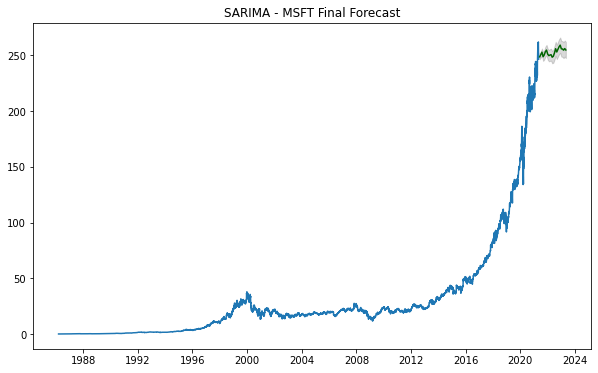

In [71]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.Close.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

#Transaforming Data to Dates
print(fitted_series)

# Plot
plt.plot(df.Close)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - MSFT Final Forecast")
plt.show()